#### Define Imports

In [1]:
#https://www.nps.gov/subjects/socialscience/visitor-use-statistics-dashboard.htm

In [2]:
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.ticker as ticker

sys.path.insert(0,'../')
from environment import env

#### Define Variables

In [3]:
config = env.env()

# Input
nps_df = pd.read_csv('../05_nps_analysis/NPS_visitations_2023.csv')

# Outputs
monthly = 'nps_monthly_visits.csv'
yearly = 'nps_yearly_visits.csv'
top_parks = 'nps_top_parks.csv'

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

#### Define Functions

In [98]:
def create_full_parkname(row):
    """
    Removes abbreviation from parkname field and replaces it with park type to create full park name
    """
    park_name_parts = row['ParkName'].split()
    park_name_parts[-1] = row['ParkType']
    return ' '.join(park_name_parts)

#### Analyze Data

In [99]:
# Make RecreationVisits field numeric
nps_df.RecreationVisits = nps_df.RecreationVisits.apply(lambda x : x.replace(',',''))
nps_df['RecreationVisits'] = pd.to_numeric(nps_df['RecreationVisits'])

# Removes abbreviation from park name
nps_df['Full_ParkName'] = nps_df.apply(create_full_parkname, axis=1)

# Convert month number to month name for visualizations
nps_df['Month_OG'] = nps_df['Month']
nps_df['Month'] = nps_df['Month'].apply(lambda x: calendar.month_name[x])
nps_df

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,Full_ParkName,Month_OG
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,January,7470,0,"7,470",...,0,0,0,0,0,0,0,0,Abraham Lincoln Birthplace National Historical...,1
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,February,8750,0,"8,750",...,0,0,0,0,0,0,0,0,Abraham Lincoln Birthplace National Historical...,2
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,March,15588,0,"15,588",...,0,0,0,0,0,0,0,0,Abraham Lincoln Birthplace National Historical...,3
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,April,24682,0,"24,682",...,0,0,0,0,0,0,0,0,Abraham Lincoln Birthplace National Historical...,4
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2023,May,27366,0,"27,366",...,0,0,0,0,0,0,0,0,Abraham Lincoln Birthplace National Historical...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,Zion NP,ZION,National Park,Intermountain,UT,2023,August,458449,"1,860","3,027,979",...,"5,475","95,381",0,"100,411","85,948","8,497",0,"30,211",Zion National Park,8
4724,Zion NP,ZION,National Park,Intermountain,UT,2023,September,491799,"1,800","3,063,140",...,"5,475","95,381",0,"100,411","85,948","8,497",0,"30,211",Zion National Park,9
4725,Zion NP,ZION,National Park,Intermountain,UT,2023,October,504584,"1,860","3,149,423",...,"5,475","95,381",0,"100,411","85,948","8,497",0,"30,211",Zion National Park,10
4726,Zion NP,ZION,National Park,Intermountain,UT,2023,November,284978,"1,800","1,896,028",...,"5,475","95,381",0,"100,411","85,948","8,497",0,"30,211",Zion National Park,11


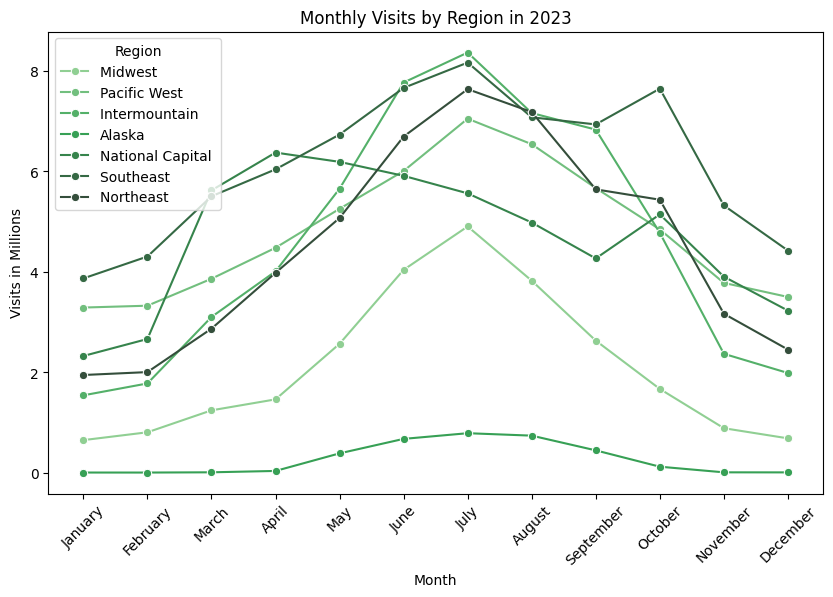

In [100]:
# Filter out unnecessary fields
df = nps_df[['Region','Month','RecreationVisits']]

# Group data
df = df.groupby(['Region', 'Month']).sum().reset_index()

# Set months to ordinal data
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df = df.sort_values('Month')

df.to_csv(monthly, index=False)

# Create plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='RecreationVisits', hue='Region', data=df, marker='o', palette='Greens_d')
plt.xlabel('Month')
plt.ylabel('Visits in Millions')
plt.title('Monthly Visits by Region in 2023')

# ChatGPT created the line below
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
plt.xticks(rotation=45)
plt.show()


C:\Users\Courtney Gibson\AppData\Local\Temp\ipykernel_13676\4036503175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RecreationVisits', y='Full_ParkName', data=df, palette='YlGn')


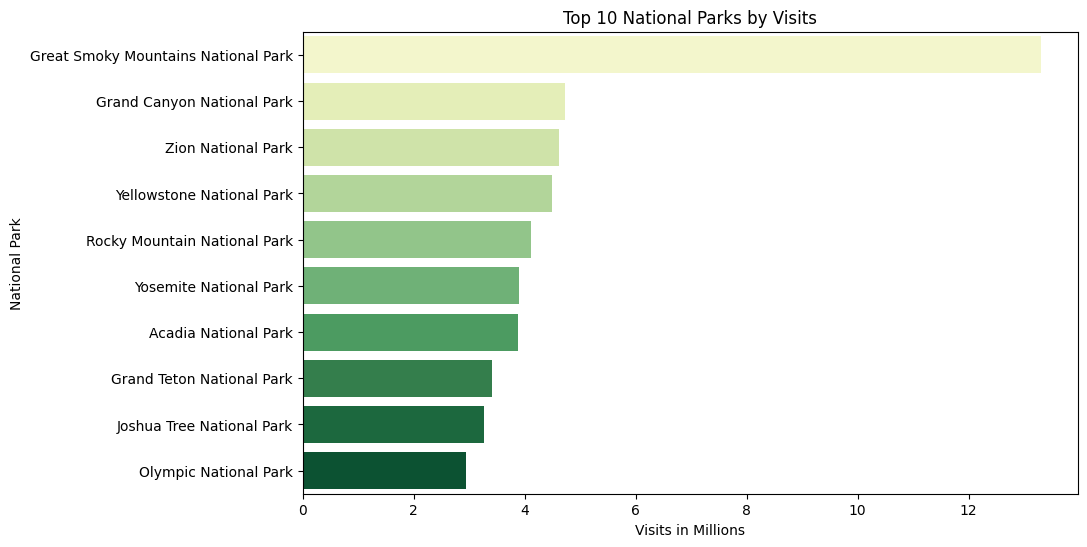

In [101]:
# Filter out entities that are not National Parks
df = nps_df[nps_df['ParkType'] == 'National Park'] 

# Filter out unnecessary fields
df = df[['Full_ParkName','RecreationVisits']]

# Group data
df = df.groupby(['Full_ParkName']).sum().reset_index()

# Sort data desc and truncate to top 10
df = df.sort_values(by=['RecreationVisits'], ascending=False).head(10)

df.to_csv(top_parks, index=False)

# Create plot
plt.figure(figsize=(10, 6))
sns.barplot(x='RecreationVisits', y='Full_ParkName', data=df, palette='YlGn')
plt.xlabel('Visits in Millions')
plt.ylabel('National Park')
plt.title('Top 10 National Parks by Visits')
# ChatGPT created the line below
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
plt.show()


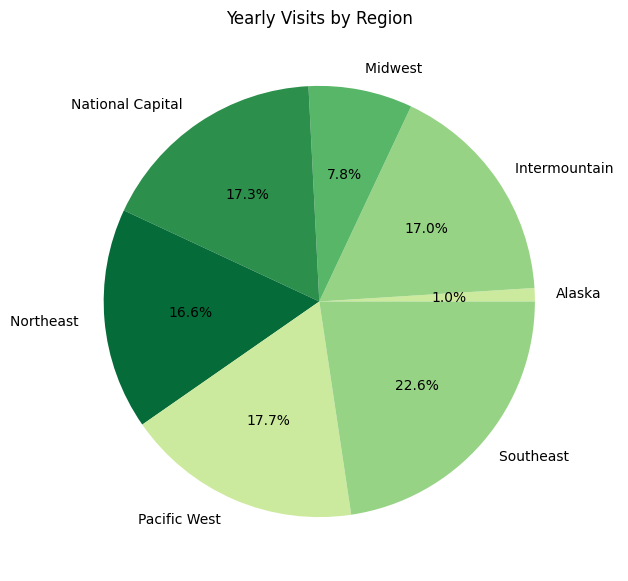

In [102]:
# Filter out unnecessary fields
df = nps_df[['Region','RecreationVisits']]

# Group data
df = df.groupby(['Region']).sum().reset_index()

df.to_csv(yearly, index=False)

# Create plot
colors = sns.color_palette('YlGn')[1:8]
plt.figure(figsize=(10, 7))
plt.pie(df['RecreationVisits'], labels=df['Region'], colors=colors, autopct='%1.1f%%')
plt.title('Yearly Visits by Region')
plt.show()